In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
features_path = 'data/lyrl2004_vectors_test_pt0.dat'
labels_path = 'data/rcv1-v2.topics.qrels'

features_file  = open(features_path,'r')
labels_file = open(labels_path,'r')

In [3]:
out = open('./data/test_labels_balanced.dat','w')

In [4]:
features = features_file.readlines()
ids = [i.split(' ')[0] for i in features]

In [5]:
len(ids)

199328

In [6]:
labels_lines = []

for elem in labels_file.readlines():
    line = elem.split(' ')
    labels_lines.append((line[1], line[0]))

In [7]:
labels_dict = {}
# Associate labels to each data points
for elem in labels_lines:
    if labels_dict.get(elem[0]) == None:
        labels_dict[elem[0]] = []
                       
    labels_dict[elem[0]].append(elem[1])
    
    

In [8]:
# Get all training data labelslabels
train_all_labels = []
for id_ in ids:
    train_all_labels.extend(labels_dict[id_])

In [9]:
label_counts = [(x, train_all_labels.count(x)) for x in set(train_all_labels)]
label_counts.sort(key=lambda x: x[1])
print(label_counts)

[('E312', 12), ('G159', 19), ('E313', 25), ('E142', 55), ('G156', 75), ('GFAS', 77), ('E141', 84), ('E61', 98), ('GOBIT', 168), ('GTOUR', 194), ('C313', 238), ('E132', 243), ('C331', 305), ('E143', 318), ('E311', 423), ('C16', 438), ('GWELF', 438), ('C32', 464), ('E513', 491), ('E411', 510), ('G157', 535), ('GSCI', 542), ('E14', 552), ('E121', 564), ('G155', 579), ('E31', 591), ('G152', 594), ('GODD', 602), ('C173', 623), ('G153', 625), ('C23', 665), ('GREL', 721), ('E511', 830), ('GWEA', 886), ('G151', 958), ('GENT', 987), ('C311', 1085), ('C182', 1131), ('G158', 1140), ('C34', 1178), ('E71', 1385), ('E131', 1425), ('GENV', 1480), ('GPRO', 1487), ('GHEA', 1568), ('E13', 1669), ('C22', 1723), ('C312', 1785), ('C183', 1871), ('C174', 1942), ('C14', 1946), ('C1511', 2013), ('E11', 2161), ('G154', 2230), ('GDEF', 2234), ('GDIS', 2249), ('C411', 2480), ('C12', 2652), ('C41', 2719), ('M142', 2733), ('C172', 2818), ('C42', 3094), ('E512', 3449), ('E211', 3674), ('C33', 3846), ('GVOTE', 4151)

In [10]:
label_kept = ['CCAT']

In [11]:
cnt=0
cnt_len = 0
for idx,id_ in enumerate(ids):
    cnt_len+=1
    line_label = labels_dict.get(id_,'O')
    
    if set(line_label) & set(label_kept) :
        out.write(features[idx][:-1]+' 1\n')
        cnt += 1

    else:
        out.write(features[idx][:-1]+' -1\n')
        

In [12]:
out.flush()

In [13]:
features_file.close()
labels_file.close()
out.close()

In [14]:
len(ids)-cnt, cnt

(101305, 98023)

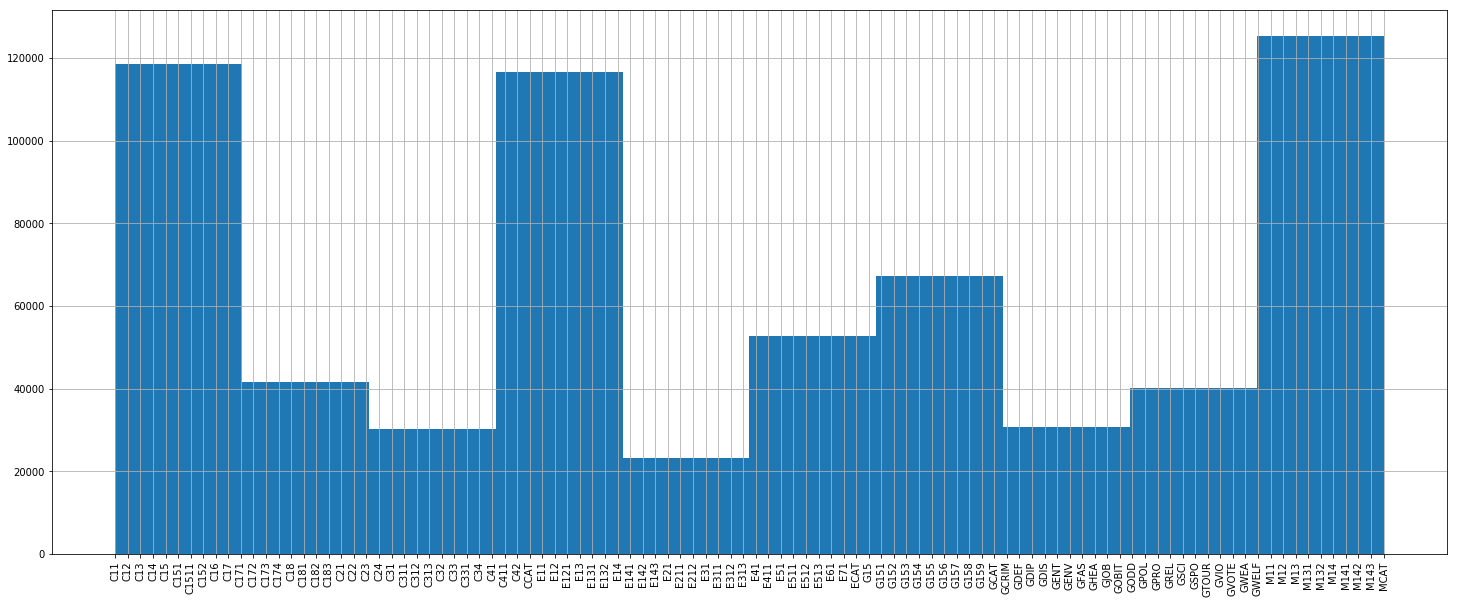

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10);
ax.hist(train_all_labels);
plt.xticks(rotation=90);
ax.grid();

In [16]:
a = open('data/test_labels_balanced.dat','r')

In [17]:
a.seek(3391)
a.readline()

'0.0784179058148571 6635:0.162516228277058 6713:0.0848817948051598 7340:0.0597156557168718 7632:0.0746352214304391 8260:0.0834867068586381 8469:0.0729677329559382 9540:0.0723461062203287 9706:0.155046001554905 10159:0.0593568298171702 10228:0.0898404216956463 10383:0.0730312312794266 10913:0.128911823857717 12245:0.283648886503812 12314:0.162516228277058 12316:0.0966219895819299 13627:0.0228635953411077 14067:0.0655315482055314 14190:0.0963503814651799 14311:0.061452462674038 14422:0.0572844537130233 14977:0.0580969477208517 15030:0.0780665810536855 15398:0.167582182403026 15507:0.130567437572507 15562:0.204982337588846 16393:0.114104288419755 16395:0.0385899607561994 16809:0.0285223281865398 17824:0.117710355717936 18032:0.133560853182703 18150:0.0244263963709828 18450:0.0442678620382495 19364:0.076813216522503 20445:0.0958204880082606 20766:0.127008414367909 20822:0.104605478088347 21032:0.102114356466218 21041:0.0808057663665662 21102:0.147823297867644 24356:0.0348096405060634 24437